   ---
---

<center><h2>📍 📍 Usecase: Online Shoppers Purchasing Intention - To predict online shoppers' intention to make a purchase based on various features related to their browsing behaviour.📍 📍</h2></center>
    
    
---

#### `Predict online shoppers' intention to make a purchase based on various features related to their browsing behaviour.

---

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
pip install matplotlib

In [1]:
# Make necessary imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, confusion_matrix, accuracy_score, classification_report

In [2]:
# Load the data
PATH = 'dataset/online shoppers intention.csv'
df = pd.read_csv(PATH)

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,10,416.583333,0.0,0.036667,0.000000,0.0,Dec,1,1,3,2,Returning_Visitor,False,False
1,0,0.000000,0,0.0,3,133.500000,0.0,0.088889,0.000000,0.0,Mar,1,2,1,8,Returning_Visitor,False,False
2,5,408.408333,2,47.5,54,1547.477273,0.0,0.017333,0.000000,0.0,Nov,2,2,3,2,Returning_Visitor,True,True
3,0,0.000000,0,0.0,19,686.583333,0.0,0.010526,0.000000,0.0,Dec,1,1,5,2,Returning_Visitor,True,False
4,0,0.000000,0,0.0,69,2734.818254,0.0,0.004353,49.392716,0.0,May,4,5,3,2,Returning_Visitor,False,True


In [4]:
# Target feature classes proportions
revenue_counts = pd.DataFrame({'Count': df.Revenue.value_counts(), 
                               'Proportion': df.Revenue.value_counts()/len(df)}).rename_axis('Revenue')
revenue_counts

,Count,Proportion
Revenue,,
False,10422,0.845255
True,1908,0.154745


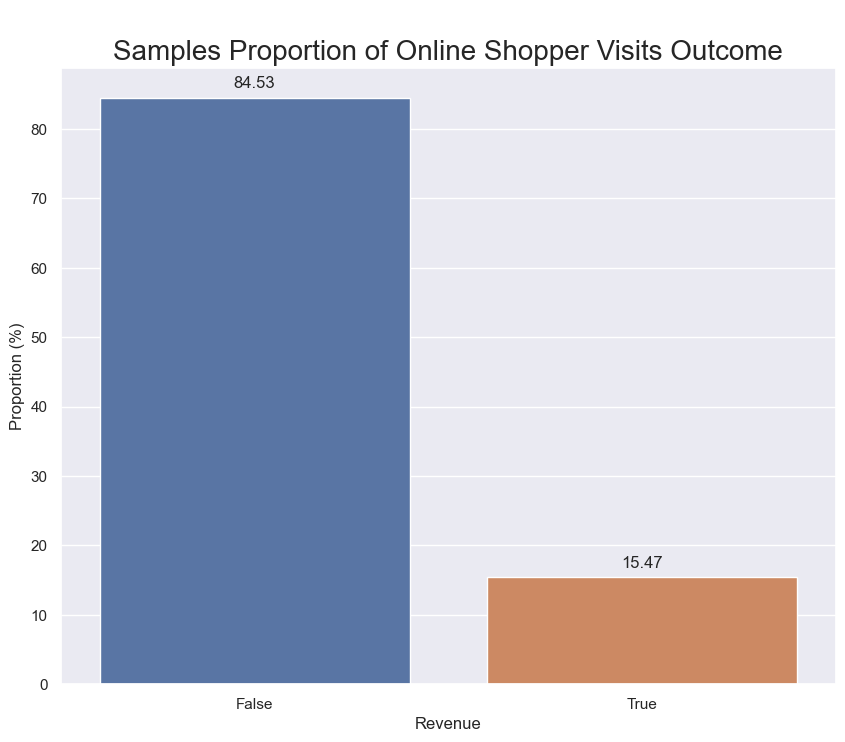

In [6]:
# Plot target feature classes proportions
plt.figure(figsize=(10, 8))
splot = sns.barplot(x=revenue_counts.index, y=revenue_counts.Proportion*100)
plt.title('\nSamples Proportion of Online Shopper Visits Outcome', size=20)
plt.ylabel('Proportion (%)')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [8]:
#  checking the distribution of Weekend

df['Weekend'].value_counts()
     

False    9462
True     2868
Name: Weekend, dtype: int64

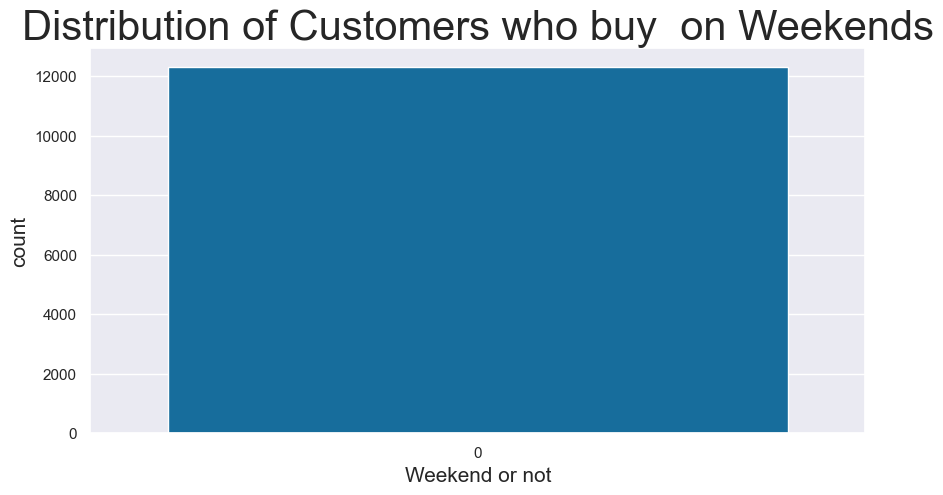

In [10]:
# checking the Distribution of customers on Weekend

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(df['Weekend'], palette = 'colorblind')
plt.title('Distribution of Customers who buy  on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [11]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

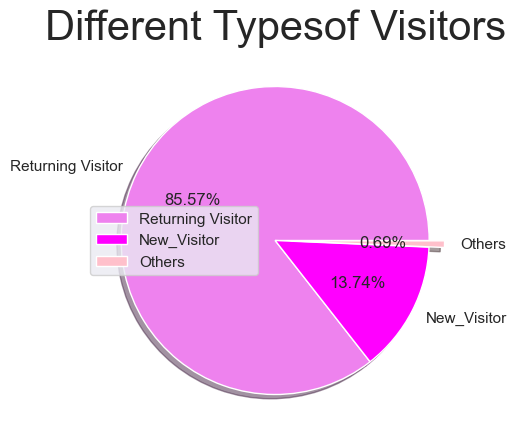

In [12]:
# plotting a pie chart for browsers

size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Typesof Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

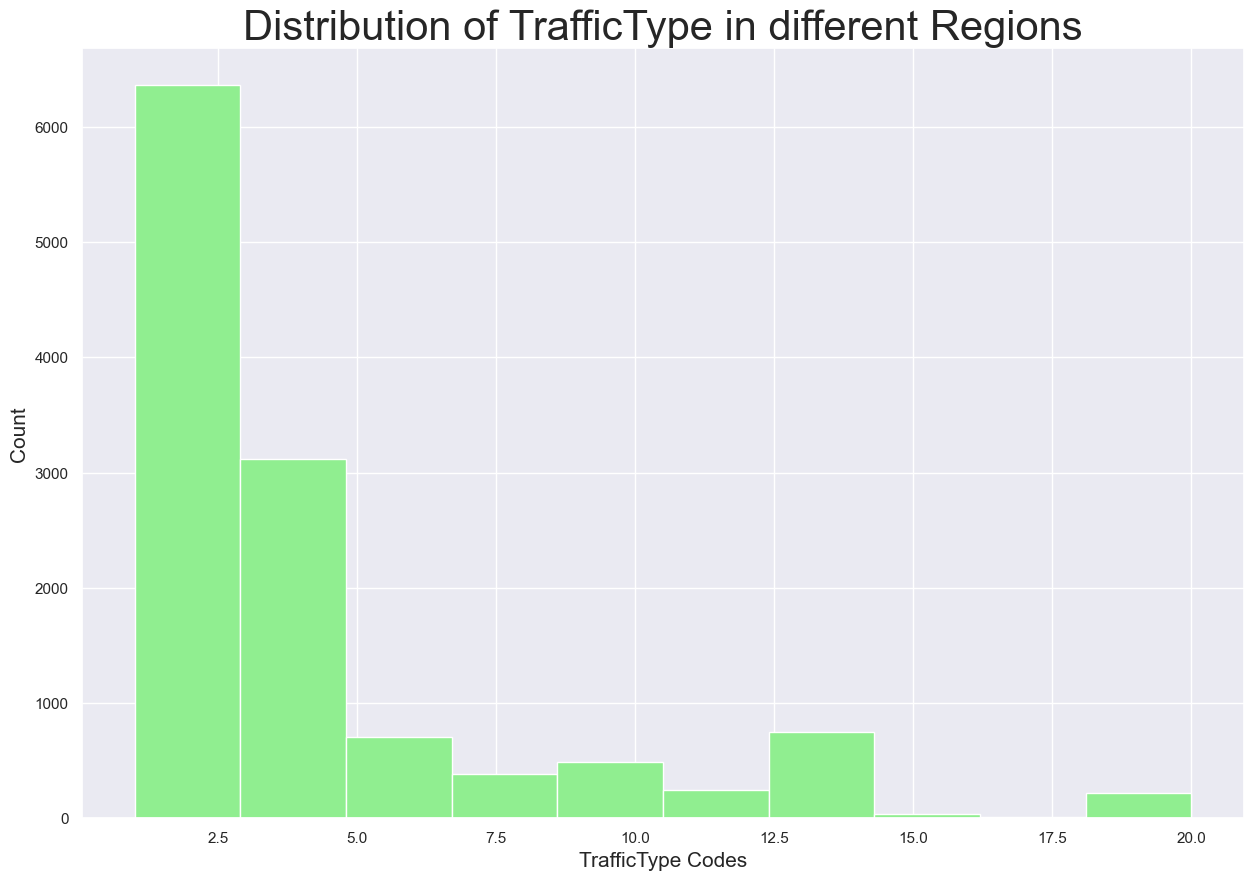

In [14]:

# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(df['TrafficType'], color = 'lightgreen')
plt.title('Distribution of TrafficType in different Regions',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

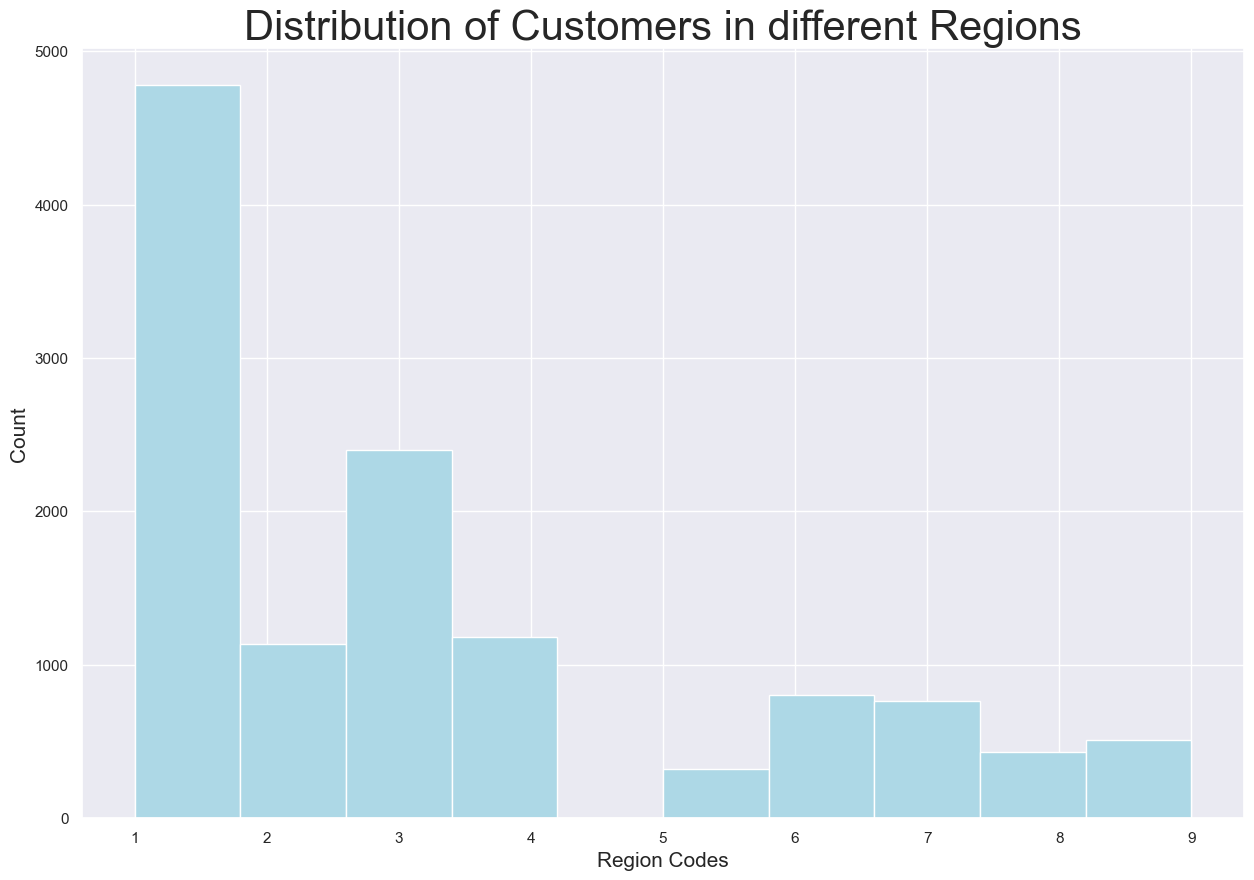

In [16]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(df['Region'], color = 'lightblue')
plt.title('Distribution of Customers in different Regions',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [17]:

# checking different no. of browsers they use for shopping

df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

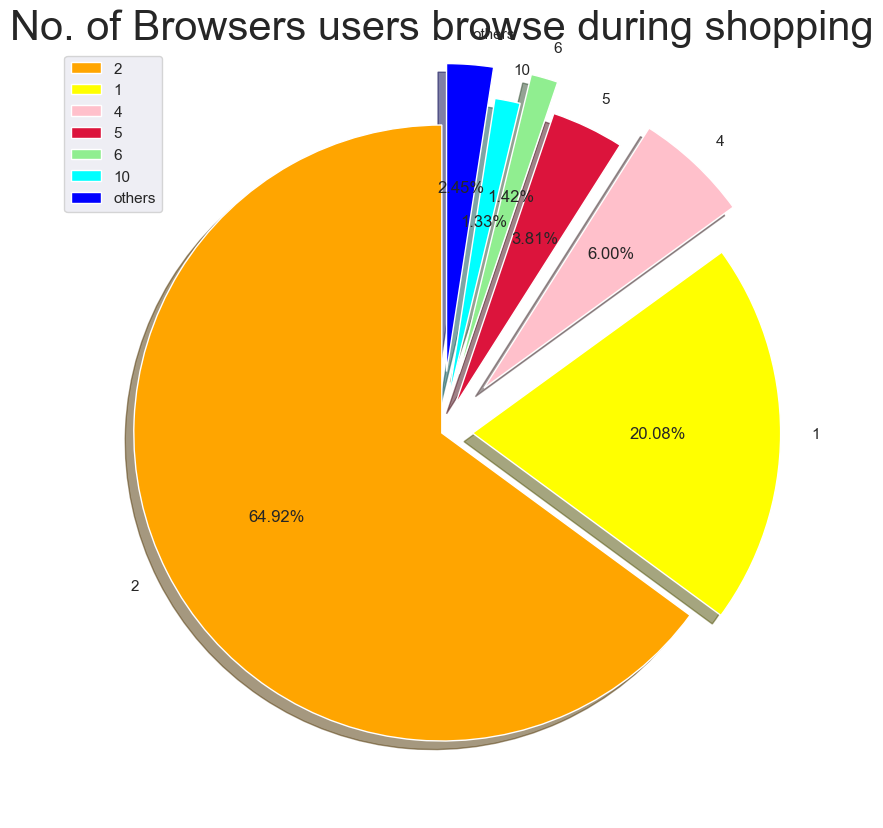

In [18]:
# plotting a pie chart for browsers

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"
explode = [0, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('No. of Browsers users browse during shopping', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [19]:

# checking the no. of OSes each user is having

df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

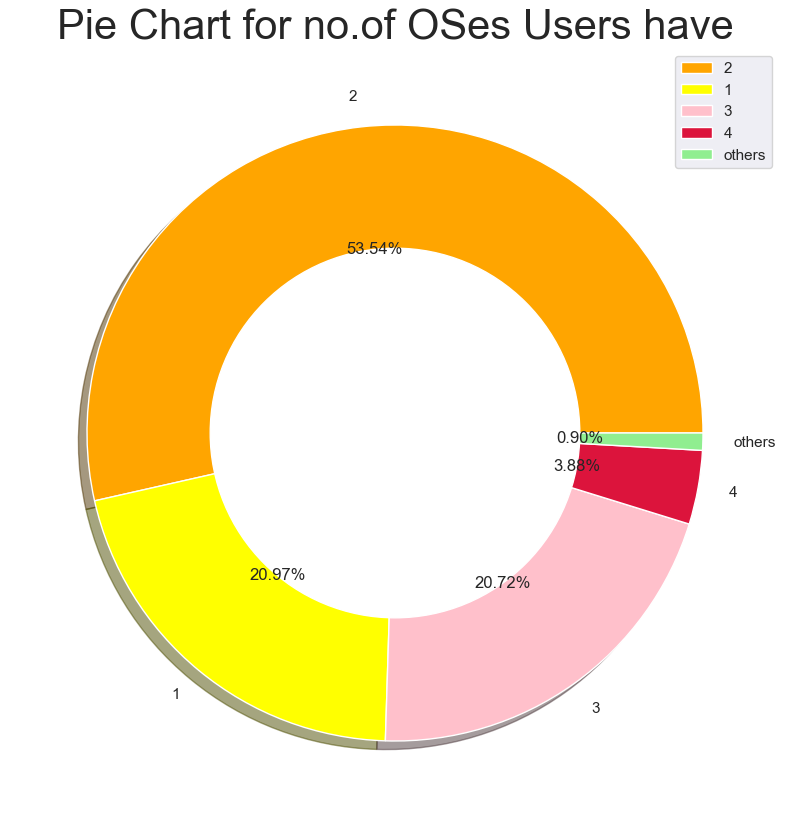

In [20]:

# creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart for no.of OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [21]:

#checking the months with most no.of customers visiting the online shopping sites

df['Month'].value_counts()
     

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

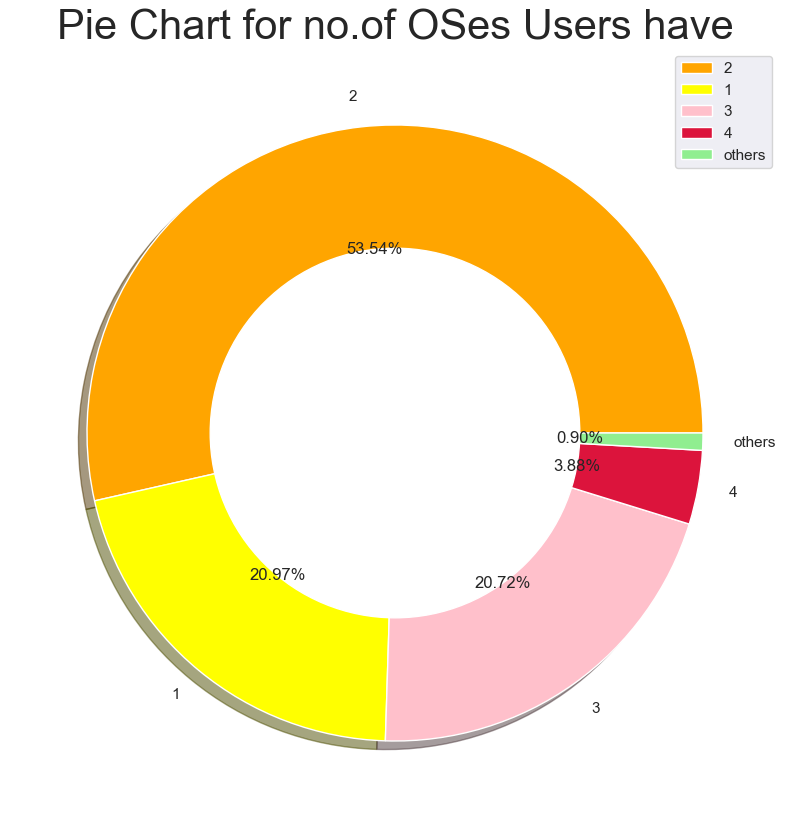

In [22]:
# creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart for no.of OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()
     

In [23]:

#checking the months with most no.of customers visiting the online shopping sites

df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [25]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [27]:
# one hot encoding 

data1 = pd.get_dummies(df)

data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [28]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Revenue'] = le.fit_transform(df['Revenue'])
df['Revenue'].value_counts()
     

0    10422
1     1908
Name: Revenue, dtype: int64

In [47]:
# getting dependent and independent variables
x = data1.drop('Revenue', axis=1)
y = df['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 28)
Shape of y: (12330,)


In [48]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


In [49]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
     

In [50]:
# feature extraction

from sklearn.decomposition import PCA

pca = PCA(n_components = None)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [51]:
# MODELLING

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8861082145753678
Testing Accuracy : 0.8851040821843742
[[3044   77]
 [ 348  230]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      3121
           1       0.75      0.40      0.52       578

    accuracy                           0.89      3699
   macro avg       0.82      0.69      0.73      3699
weighted avg       0.87      0.89      0.87      3699



In [52]:
# MODELLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)
     

Training Accuracy : 1.0
Testing Accuracy : 0.8805082454717491
[[3041   80]
 [ 362  216]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3121
           1       0.73      0.37      0.49       578

    accuracy                           0.88      3699
   macro avg       0.81      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699



In [53]:
# MODELLING

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)    


C:\Users\jeyan\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy : 0.8883095817402387
Testing Accuracy : 0.8799675587996756
[[3007  114]
 [ 330  248]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3121
           1       0.69      0.43      0.53       578

    accuracy                           0.88      3699
   macro avg       0.79      0.70      0.73      3699
weighted avg       0.87      0.88      0.87      3699



In [54]:

# MODELLING

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)
     

Training Accuracy : 1.0
Testing Accuracy : 0.8288726682887266
[[2805  316]
 [ 317  261]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3121
           1       0.45      0.45      0.45       578

    accuracy                           0.83      3699
   macro avg       0.68      0.68      0.68      3699
weighted avg       0.83      0.83      0.83      3699



In [55]:
# MODELLING

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.9031398447456842
Testing Accuracy : 0.8902406055690727
[[3024   97]
 [ 309  269]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3121
           1       0.73      0.47      0.57       578

    accuracy                           0.89      3699
   macro avg       0.82      0.72      0.75      3699
weighted avg       0.88      0.89      0.88      3699



In [56]:
# cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Mean Accuracy :", cvs.mean())
print("Mean Standard Deviation :", cvs.std())     

Mean Accuracy : 0.8922488573451783
Mean Standard Deviation : 0.002642618165909998


In [ ]:
#hyper parameter tuning

from sklearn.model_selection import GridSearchCV

params = {'C':[0.1, 1, 10], 'kernel':['rbf', 'linear', 'poly'], 'gamma': [0.1, 0.001, 0.0001]}

grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 5)
grid_search = grid_search.fit(x_train, y_train)

# getting results
print("Best Accuracy :", grid_search.best_score_)
print("Best Parameters :", grid_search.best_params_)

In [ ]:
# cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Mean Accuracy :", cvs.mean())
print("Mean Standard Deviation :", cvs.std())